# Regression with Perceptron

In this project, We will construct a neural network corresponding to a multiple linear regression model. Then We will train the network, implementing the gradient descent method, predicting real estate prices based on a number of features.

## Packages

Let's first import all the required packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

<a name='1.3'></a>
### 1.3 - Dataset

Load the UC Irvine dataset, saved in a file RealEstate.xlsx. It has seven fields: Transaction data, House age, Distance to the nearest Mrt station, Number of convenience stores, Latitude, Longitude and House price of unit area.

In [2]:
path = "RealEstate.csv"
adv = pd.read_csv(path)
adv = adv.drop(['No'], axis=1)

Check for null values in the dataset. 

In [3]:
pd.isnull(adv).sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Make a heatmap.

<Axes: >

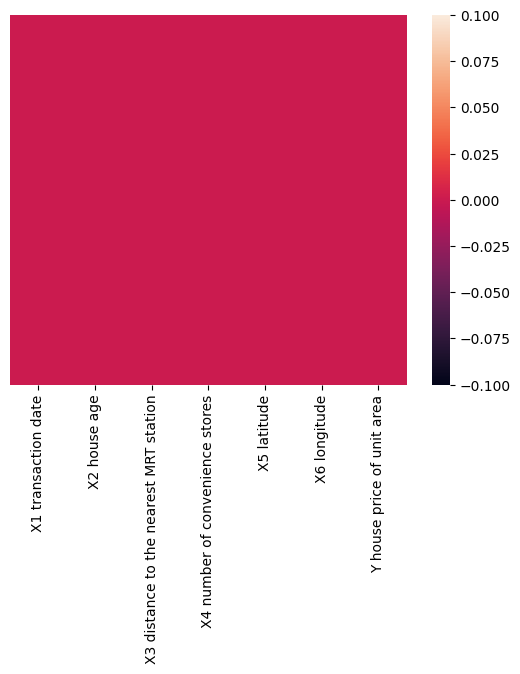

In [4]:
sns.heatmap(adv.isnull(), yticklabels=False)

Now make a Correlation matrix

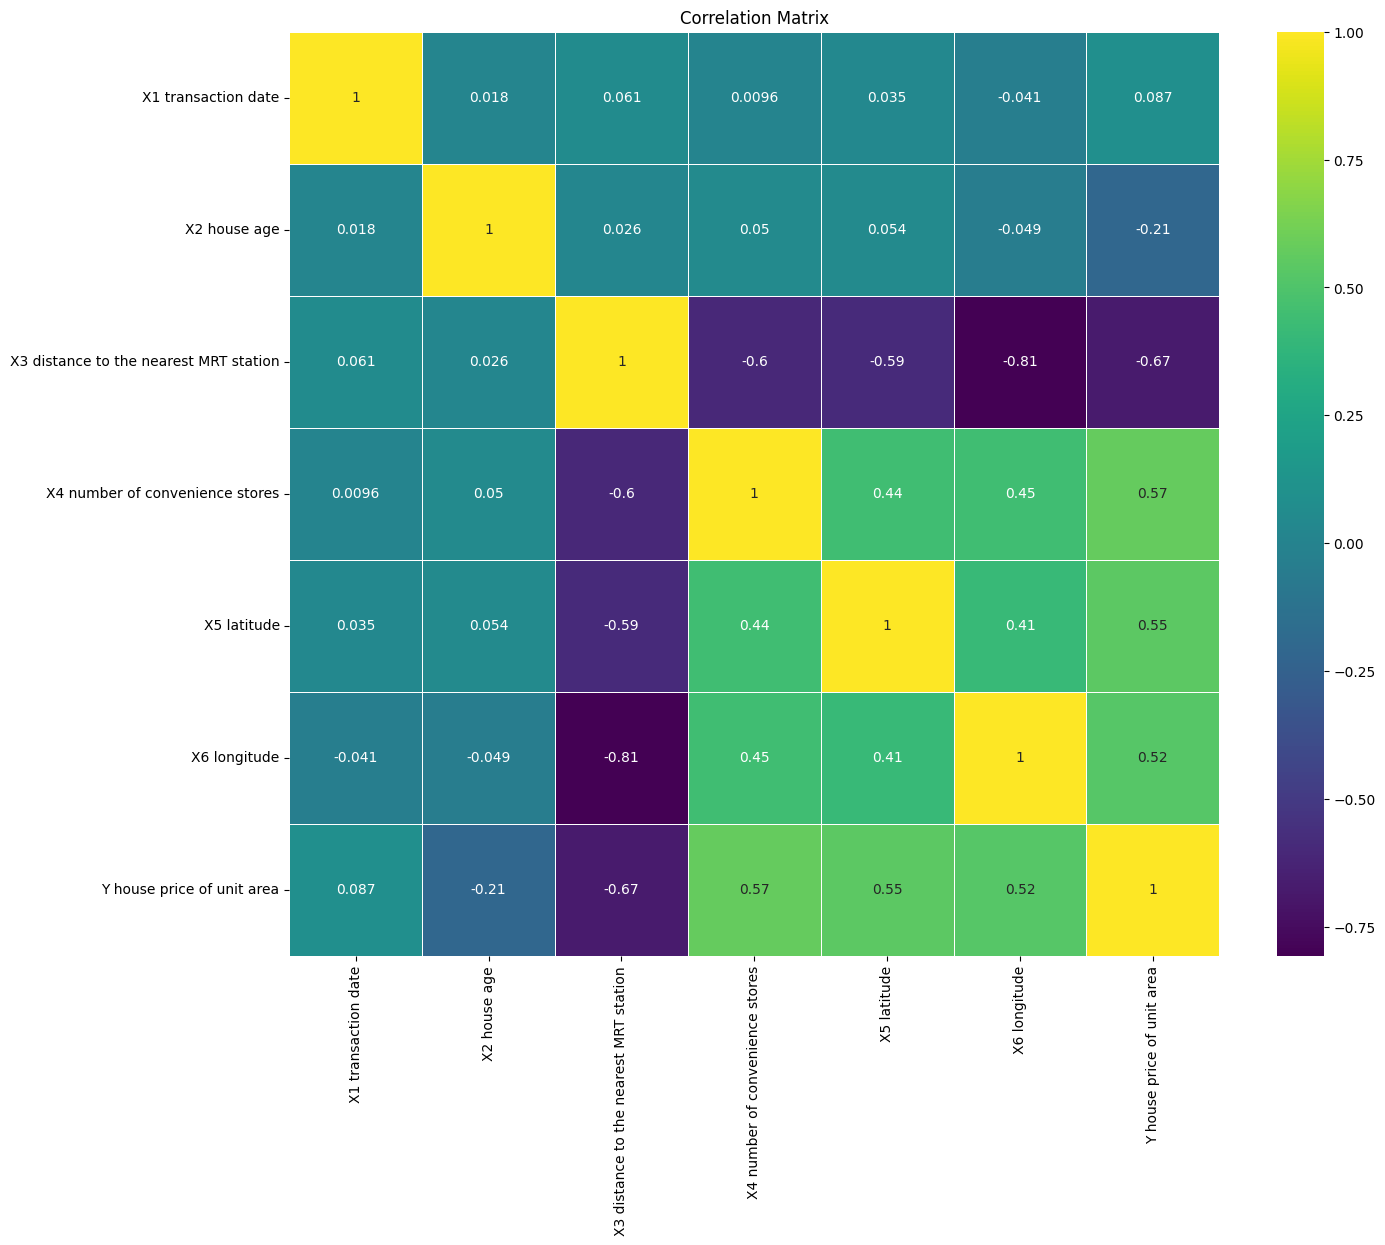

In [5]:
#Correlation matrix to figure out which features to drop
c_mat=adv.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(c_mat, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Check for Duplicate values in the dataset. 

In [6]:
duplicates = adv[adv.duplicated()]
duplicates

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


Check for negative values in the dataset.

In [7]:
negative = adv[adv['X1 transaction date']<0]
print(negative)


Empty DataFrame
Columns: [X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area]
Index: []


In [8]:
adv.describe()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Checking and removing outliers using interquantile range (IQR) method 

In [9]:
'''distance to the nearest MRT station values ranges from 0 to 61488.02, clearly there are some outliers 
present here'''
min1,max1=adv['X3 distance to the nearest MRT station'].quantile([0.001,0.999])
'''Check for outliers in house age and house price too'''
min2,max2=adv['X2 house age'].quantile([0.001,0.999])
min3,max3=adv['Y house price of unit area'].quantile([0.001,0.999])
print((min1,max1),(min2,max2),(min3,max3),sep="\n")

(23.38284, 6450.133206000004)
(0.0, 43.34570000000005)
(9.0868, 101.3104000000018)


checking the values from the decribe cell, we can see that X3 has max outliers, X2 has max outliers, and Y has both min and max outliers

In [10]:
X3_maxoutliers=adv[adv['X3 distance to the nearest MRT station']>max1] #checking for X3>max rows
X2_maxoutliers=adv[adv['X2 house age']>max2] #checking for X2>max rows
Y_maxoutliers=adv[adv['Y house price of unit area']>max3] #checking for Y>max rows
Y_minoutliers=adv[adv['Y house price of unit area']<min3] #checking for Y<min rows


Remove the outliers

In [11]:
adv=adv.drop(X3_maxoutliers.index)
adv=adv.drop(X2_maxoutliers.index)
adv=adv.drop(Y_maxoutliers.index)
adv=adv.drop(Y_minoutliers.index)


Data Exploration

In [12]:
#printing no of unique values in each column
for column in adv.columns:
    print(column,adv[column].nunique())

X1 transaction date 12
X2 house age 233
X3 distance to the nearest MRT station 255
X4 number of convenience stores 11
X5 latitude 231
X6 longitude 230
Y house price of unit area 266


Histograms for all the input features.

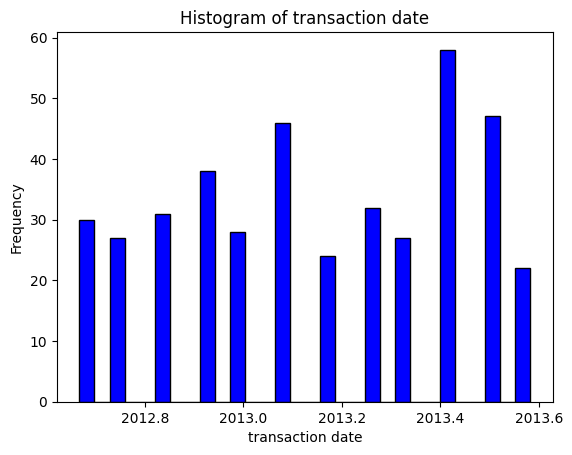

In [13]:
plt.hist(adv['X1 transaction date'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of transaction date')
plt.xlabel('transaction date')
plt.ylabel('Frequency')
plt.show()

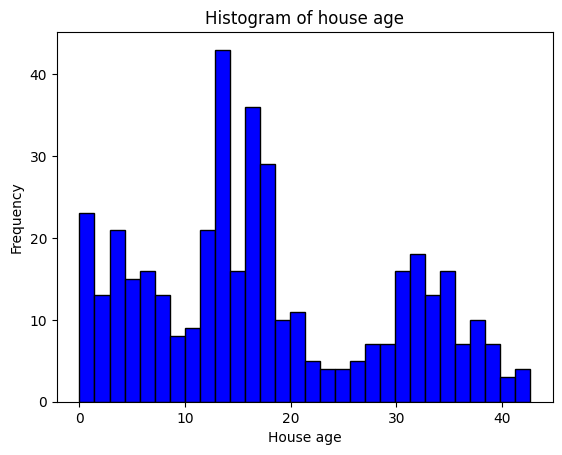

In [14]:
plt.hist(adv['X2 house age'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of house age')
plt.xlabel('House age')
plt.ylabel('Frequency')
plt.show()

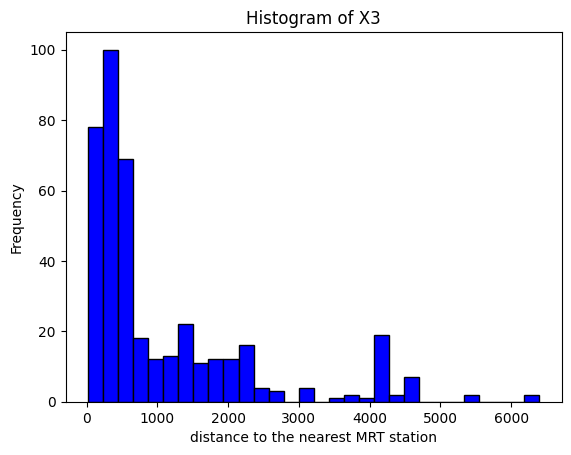

In [15]:
plt.hist(adv['X3 distance to the nearest MRT station'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of X3')
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('Frequency')
plt.show()

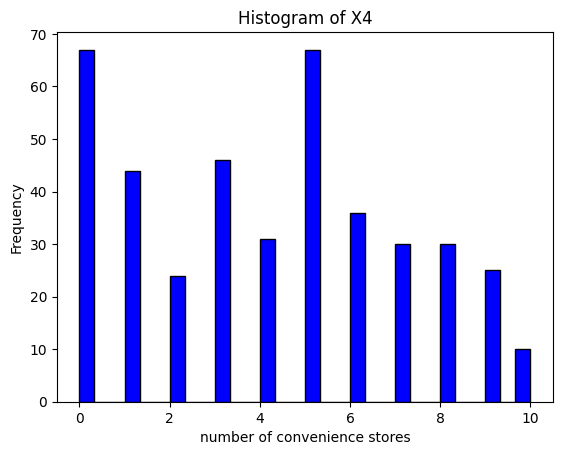

In [16]:
plt.hist(adv['X4 number of convenience stores'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of X4')
plt.xlabel('number of convenience stores')
plt.ylabel('Frequency')
plt.show()

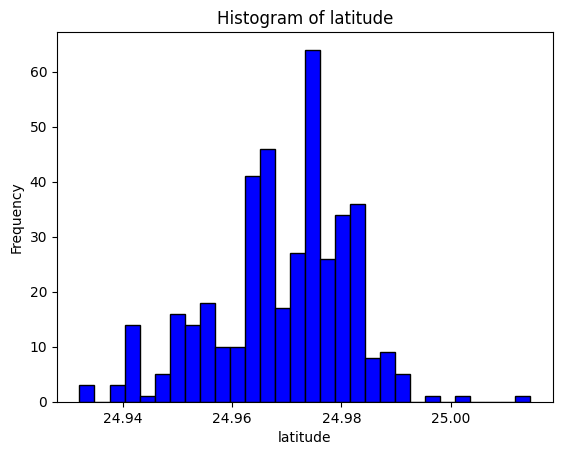

In [17]:
plt.hist(adv['X5 latitude'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of latitude')
plt.xlabel('latitude')
plt.ylabel('Frequency')
plt.show()

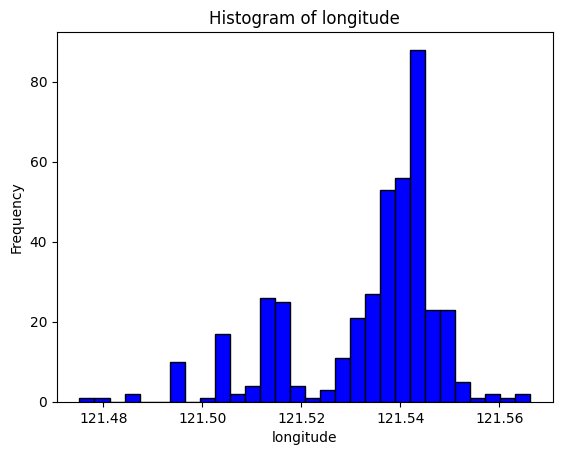

In [18]:
plt.hist(adv['X6 longitude'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of longitude')
plt.xlabel('longitude')
plt.ylabel('Frequency')
plt.show()

Use Box plot to visualize the spread and central tendency of the house price.

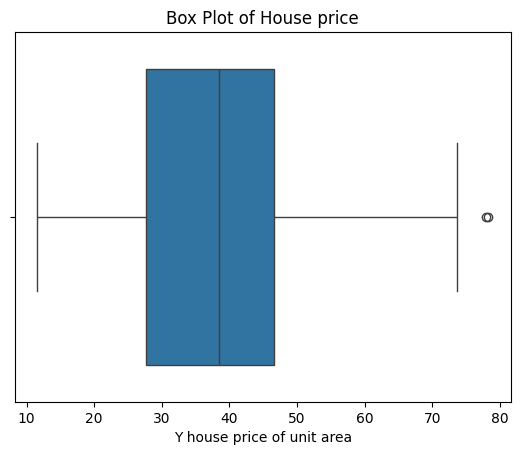

In [19]:
sns.boxplot(x=adv['Y house price of unit area'])
plt.title('Box Plot of House price')
plt.show()

Print some part of the dataset.

In [20]:
adv.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


To demonstrate a relation between features and output, a scatterplot with "distance to the nearest MRT station" as X-axis and "house price" as Y-axis is plotted.

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

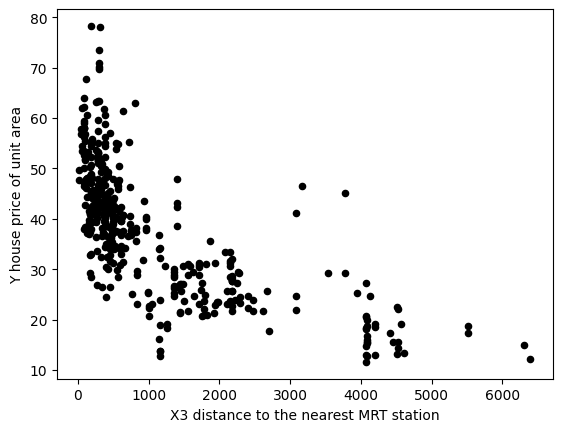

In [21]:
adv.plot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', kind='scatter', c='black')




As we can clearly see from the graph, price decreases proportionally as distnace increaces. Similary, all the features have some relation with the output. Our job is to find that relation and represent it in the form of Weights. 

The fields `distance to the nearest MRT station` and `house price of unit area` have different units. To make gradient descent algorithm efficient, we need to normalize each of our fields: subtract the mean value of the array from each of the elements in the array and divide them by the standard deviation.

In [22]:
adv_mean = np.mean(adv, axis=0)
adv_std= np.std(adv, axis=0)
adv_norm = (adv - adv_mean)/adv_std
Yorignalmean=adv_mean[6]
Yorignalstd=adv_std[6]
adv_norm.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.815839,1.261660,-0.802574,2.005308,1.119024,0.447086,-0.001095
1,-0.815839,0.160838,-0.623203,1.665565,0.906690,0.398773,0.331640
2,1.546847,-0.385169,-0.416590,0.306597,1.479349,0.689975,0.726279
3,1.252398,-0.385169,-0.416590,0.306597,1.479349,0.689975,1.306631
4,-1.113835,-1.116115,-0.555267,0.306597,0.828673,0.593349,0.401282


Plotting the data, you can see that it looks similar after normalization, but the values on the axes have changed:

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

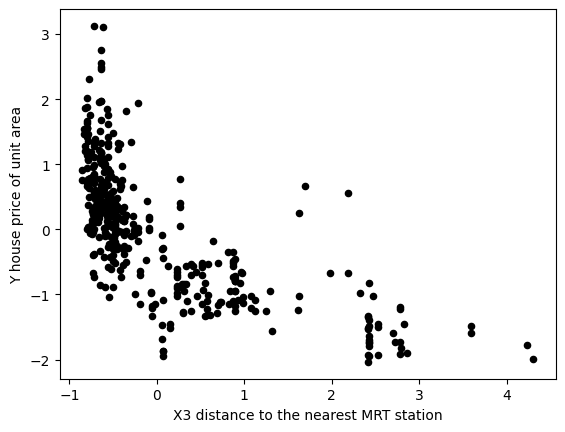

In [23]:
adv_norm.plot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', kind='scatter', c='black')

Split the date into training and testing sets

In [24]:
feature_columns = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                   'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
x = adv_norm[feature_columns]
y = adv_norm['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) #33% used for testing, 67% for training
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
X_test = X_test.drop(['X1 transaction date'], axis = 1) 
X_test = X_test.T
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_test = np.array(y_test).reshape((1, len(y_test)))

X_train shape: (274, 6)
X_test shape: (136, 6)
y_train shape: (274,)
y_test shape: (136,)


Save the fields into variables `X_norm` and `Y_norm` and reshape them to row vectors:

In [25]:

X_norm = X_train.drop(['X1 transaction date'], axis = 1) # drop transaction date as per corelation matrix
X_norm = X_norm.T
X_norm = X_norm.to_numpy()

Y_norm = y_train.to_numpy()
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

print(str(X_norm.shape))
print ('The shape of X_norm: ' + str(X_norm.shape))
print ('The shape of Y: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[1]))


(5, 274)
The shape of X_norm: (5, 274)
The shape of Y: (1, 274)
I have m = 274 training examples!


C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


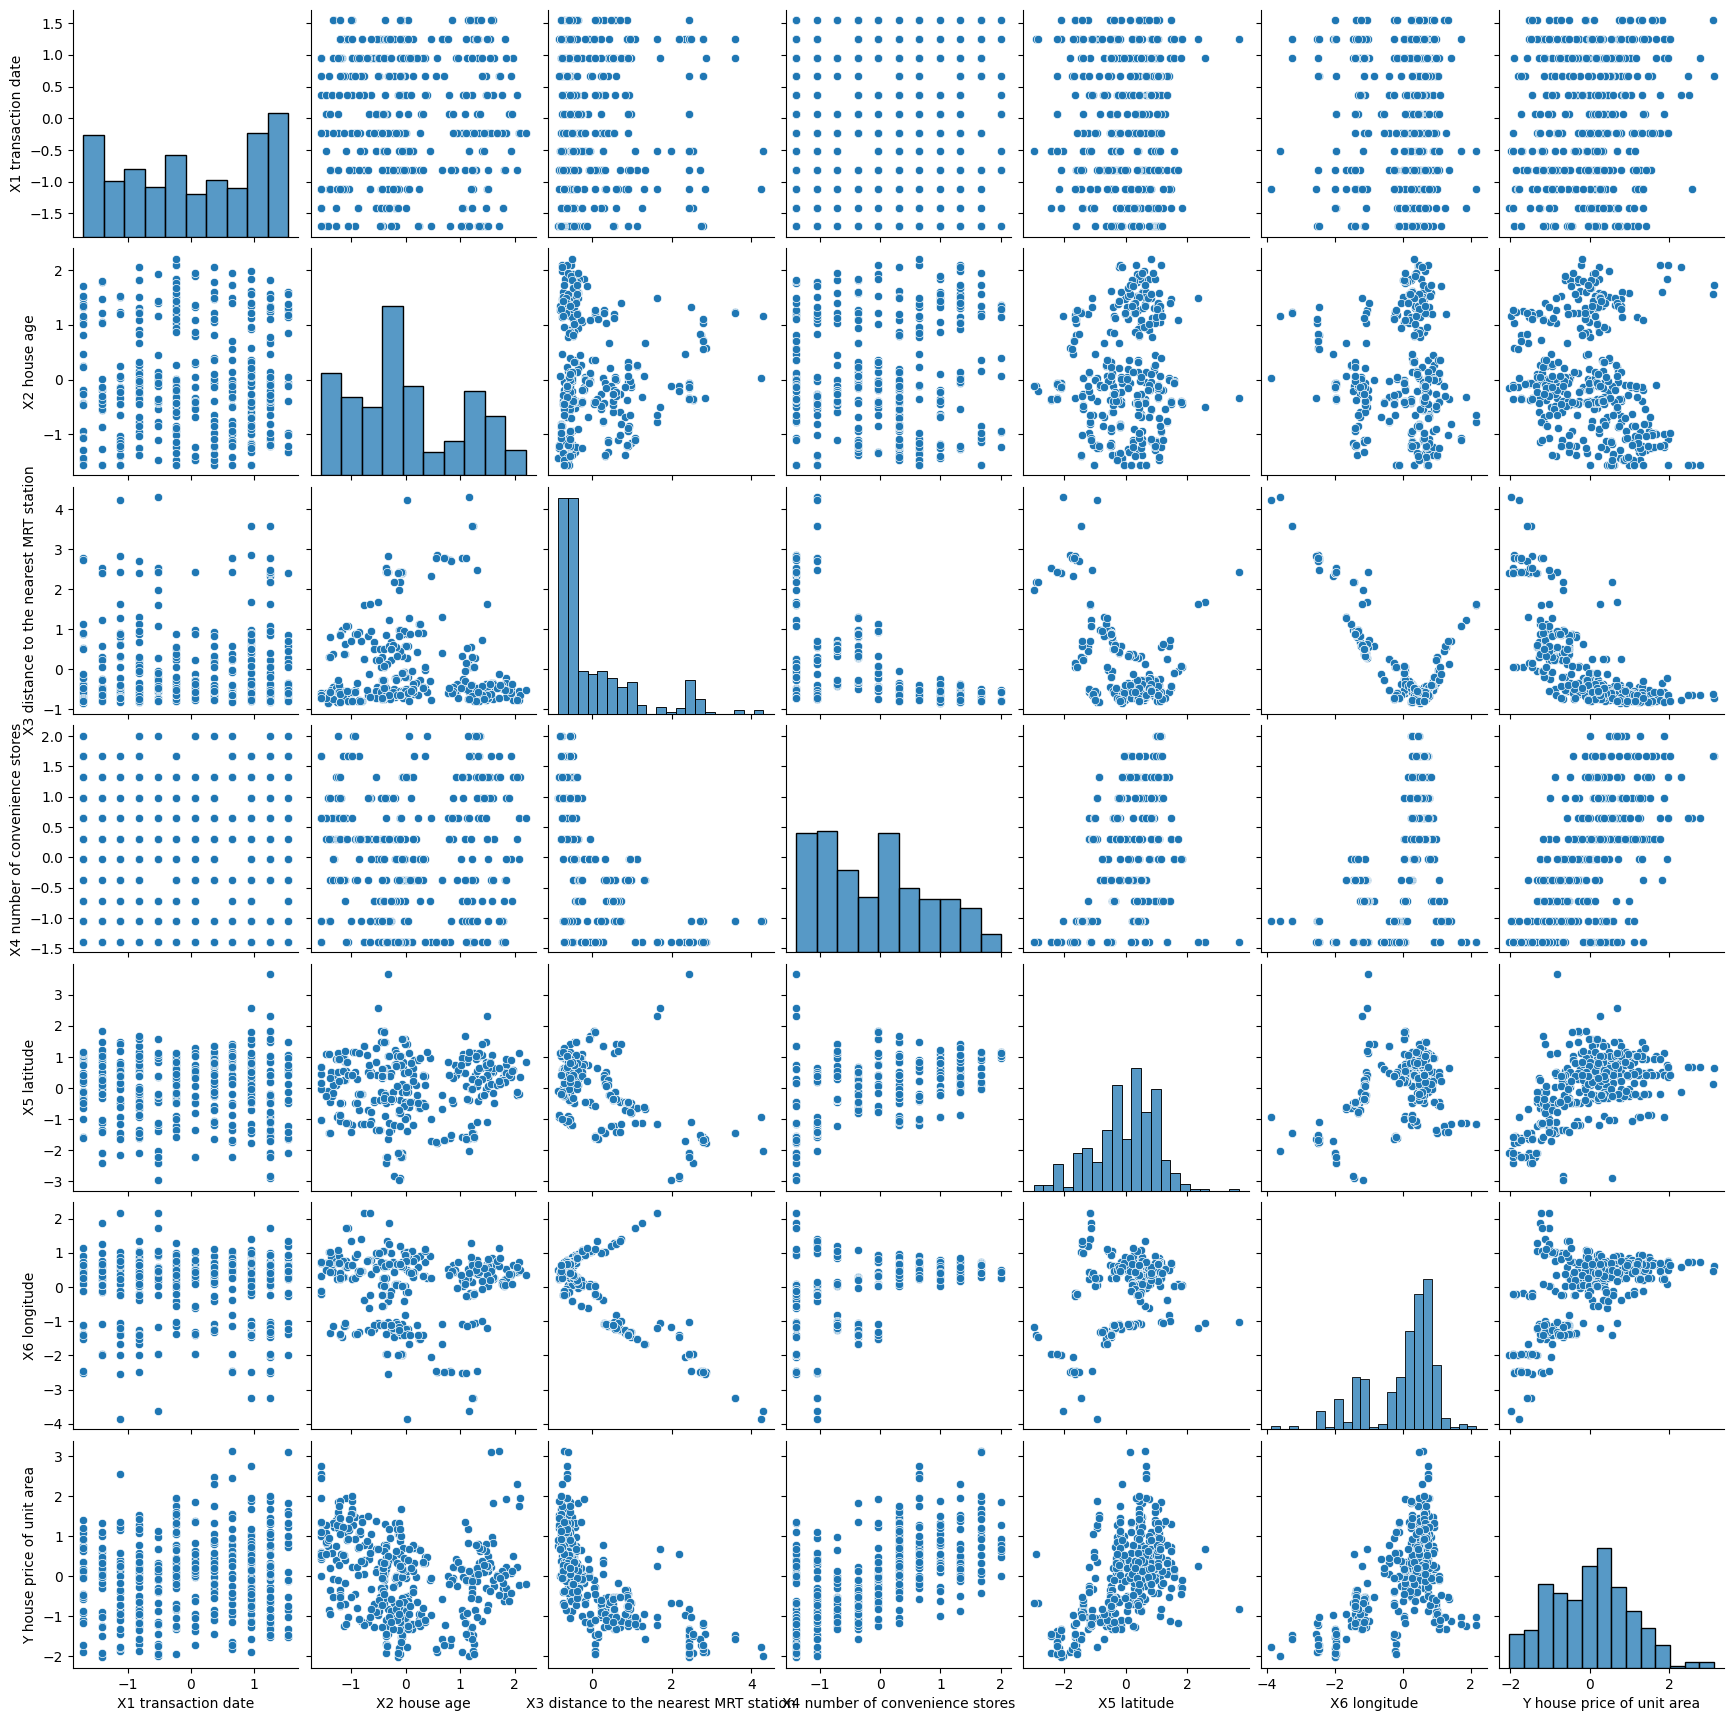

In [26]:
sns.pairplot(adv_norm)

<a name='2'></a>
## 2 - Implementation of the Neural Network Model for Linear Regression

Setup the neural network in a way which will allow to extend this simple case of a model with a single perceptron to more complicated structures later.

<a name='2.1'></a>
### 2.1 - Defining the Neural Network Structure

Define two variables:
- `n_x`: the size of the input layer
- `n_y`: the size of the output layer

using shapes of arrays `X` and `Y`.

In [27]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the output layer is: n_y = 1


<a name='2.2'></a>
### 2.2 - Initialize the Model's Parameters

Implement the function `initialize_parameters()`, initializing the weights array of shape $(n_y \times n_x) = (1 \times 1)$ with random values and the bias vector of shape $(n_y \times 1) = (1 \times 1)$ with zeros.

In [28]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    W = np.ones((n_y, n_x)) * -5
    b = np.zeros((n_y, 1))
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[-5. -5. -5. -5. -5.]]
b = [[0.]]


<a name='2.3'></a>
### 2.3 - The Loop

Implement `forward_propagation()` following the equation $(3)$ in the section [1.2](#1.2):
\begin{align}
Z &=  w X + b\\
\hat{Y} &= Z,
\end{align}

In [29]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output
    """
    W = parameters["W"]
    b = parameters["b"]
    
    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b
    Y_hat = Z

    return Y_hat

Y_hat = forward_propagation(X_norm, parameters)

print("Some elements of output vector Y_hat:", Y_hat[0, 0:5])


Some elements of output vector Y_hat: [-9.33481252  3.04743695  4.64523783 -0.37424628 18.12187777]


Your weights were just initialized with some random values, so the model has not been trained yet. 

Define a cost function $(4)$ which will be used to train the model:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [30]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y_hat.shape[1]

    # Compute the cost function.
    A = (Y_hat - Y)
    B = np.square(A)
    cost = np.sum(B)/(2*m)
    
    return cost

print("cost = " + str(compute_cost(Y_hat, Y_norm)))

cost = 48.48044087441175


Calculate partial derivatives as shown in $(5)$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\end{align}

In [31]:
def backward_propagation(Y_hat, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    Y_hat -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity. 
    dZ = Y_hat - Y
    dW = 1/m * np.matmul(dZ, X.T)
    db = 1/m * np.sum(dZ, keepdims = True)
    
    grads = {"dW": dW,
             "db": db}
    
    return grads

grads = backward_propagation(Y_hat, X_norm, Y_norm)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[-4.56511735  5.13807292 -7.00206066 -6.87855992 -5.04261855]]
db = [[-0.06316507]]


Update parameters as shown in $(6)$:

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.
\end{align}


In [32]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients 
    learning_rate -- learning rate parameter for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]
    
    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[  0.47814082 -11.1656875    3.40247279   3.2542719    1.05114227]]
b updated = [[0.07579808]]


<a name='2.4'></a>
### 2.4 - Integrate parts 2.1, 2.2 and 2.3 in nn_model() and make predictions

Build your neural network model in `nn_model()`.

In [33]:
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    parameters = initialize_parameters(n_x, n_y)
    
    # Loop
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)
        
        # Backpropagation. Inputs: "Y_hat, X, Y". Outputs: "grads".
        grads = backward_propagation(Y_hat, X, Y)
    
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [34]:
parameters_final = nn_model(X_norm, Y_norm, num_iterations=9000, learning_rate=0.2, print_cost=True)
print("W = " + str(parameters_final["W"]))
print("b = " + str(parameters_final["b"]))


Cost after iteration 0: 48.480441
Cost after iteration 1: 22.266318
Cost after iteration 2: 13.491491
Cost after iteration 3: 9.687648
Cost after iteration 4: 7.600592
Cost after iteration 5: 6.270419
Cost after iteration 6: 5.349272
Cost after iteration 7: 4.677416
Cost after iteration 8: 4.167107
Cost after iteration 9: 3.765191
Cost after iteration 10: 3.437957
Cost after iteration 11: 3.163541
Cost after iteration 12: 2.927558
Cost after iteration 13: 2.720426
Cost after iteration 14: 2.535670
Cost after iteration 15: 2.368839
Cost after iteration 16: 2.216813
Cost after iteration 17: 2.077344
Cost after iteration 18: 1.948772
Cost after iteration 19: 1.829829
Cost after iteration 20: 1.719518
Cost after iteration 21: 1.617029
Cost after iteration 22: 1.521685
Cost after iteration 23: 1.432906
Cost after iteration 24: 1.350187
Cost after iteration 25: 1.273077
Cost after iteration 26: 1.201172
Cost after iteration 27: 1.134104
Cost after iteration 28: 1.071537
Cost after iteration 

You can see that after a few iterations the cost function does not change anymore (the model converges).


The final model parameters can be used for making predictions, but we must not forget about normalization and denormalization.

In [35]:
def predict( parameters, X_pred):
    
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Use the same mean and standard deviation of the original training array X.

    # Make predictions.
    print(W)
    Y_pred_norm = np.matmul(W, X_pred) + b
    # Use the same mean and standard deviation of the original training array Y.
    Y_pred = Y_pred_norm * Yorignalstd + Yorignalmean
    
    return Y_pred



Now you are ready to make predictions:

In [36]:

Y_pred_multi = predict(parameters_final, X_test)
Y_real = (y_test*Yorignalstd+Yorignalmean)
#print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
#print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(X_test.shape)
print(f"Predictions of sales price, $:\n{(Y_pred_multi)[0][0:10]}")
print(f"real sale price is:\n{Y_real[0][0:10]}")

[[-0.18769822 -0.43490499  0.33523103  0.17007954 -0.01575856]]
(5, 136)
Predictions of sales price, $:
[38.36772633 36.13152294 47.51542684 38.05055954 44.79922176 46.13156948
 14.63272321 47.7934501  29.81804064 25.35950522]
real sale price is:
[35.1 43.5 55.  41.  36.3 49.3 12.9 49.  24.7 19. ]


Calculating R-squared to get an idea of the accuracy of our model.


In [37]:
real_mean_error = Y_real-np.mean(Y_real)
SST = np.square(real_mean_error)
SST = np.sum(SST)
estimated_mean_error = Y_pred_multi - Y_real
estimated_mean_error = np.square(estimated_mean_error)
SSR = np.sum(estimated_mean_error)
R2 = 1-(SSR/SST)
print(f"R-squared of our model is {R2}")

R-squared of our model is 0.6006557083580709
